## Functions and Plotting
#### Professor Bradley Warner
Math 377 Lesson 9 Fall 2018

### Python Functions and Tables
This is the work demonstrates use of writing functions and tables in python.

First import packages.

In [2]:
import datascience as ds
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

Next, we import the data for our work. This data is tips and total bill as well as demographic information.

In [3]:
tips = ds.Table.read_table("tips.csv")
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


### Explore Data  

We will explore the data by looking at the tips both by gender and time.

Let's find the average tip by gender.

In [8]:
tips.select("tip","sex").group("sex",np.mean)

sex,tip mean
Female,2.83345
Male,3.08962


Now by meal time.

In [5]:
tips.select("tip","time").group("time",np.mean)

time,tip mean
Dinner,3.10267
Lunch,2.72809


To visualize the tip data, we will use a histogram.

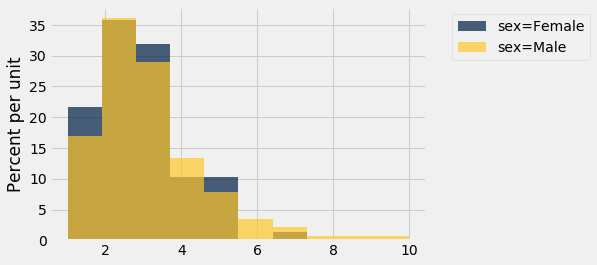

In [6]:
tips.select("tip","sex").hist("tip",group="sex")

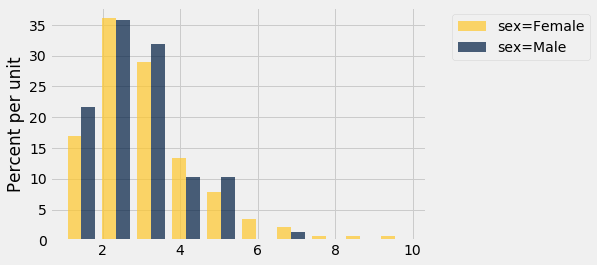

In [7]:
tips.select("tip","sex").hist("tip",group="sex",side_by_side=True) #legend wrong?

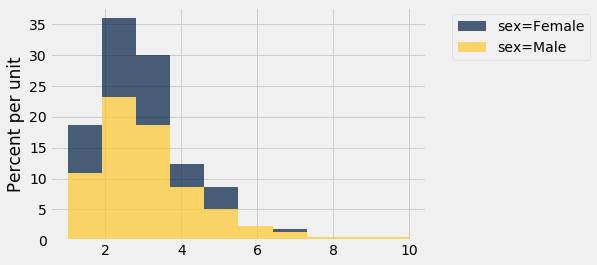

In [8]:
tips.select("tip","sex").hist("tip",group="sex",stacked=True)

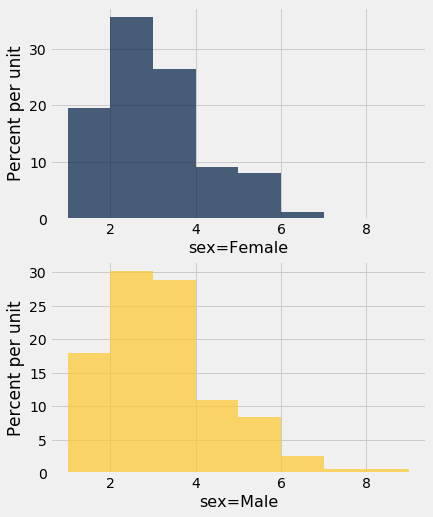

In [9]:
tips.select("tip","sex").hist("tip",group="sex",overlay=False,bins=np.arange(1,10,1))

In [10]:
tips.select("tip","sex").group("sex")

sex,count
Female,87
Male,157


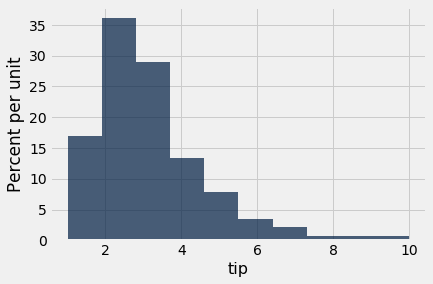

In [11]:
tips.select("tip","sex").where("sex","Male").hist("tip")

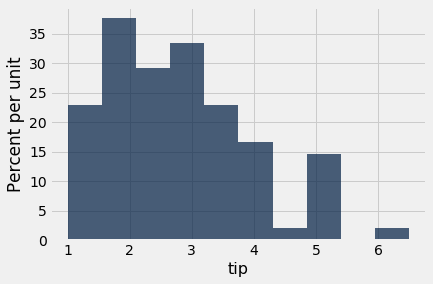

In [12]:
tips.select("tip","sex").where("sex","Female").hist("tip")

Males tip less but they have a few big tippers that drive the mean up.

### Function  
Next we will create a function to convert text day to number.

In [13]:
tips.column("day")[:5]

array(['Sun', 'Sun', 'Sun', 'Sun', 'Sun'], dtype='<U4')

In [14]:
tips.group("day")

day,count
Fri,19
Sat,87
Sun,76
Thur,62


Create dictionary to help with this function.

In [15]:
week_dict={"Mon":1,"Tues":2,"Wed":3,"Thur":4,"Fri":5,"Sat":6,"Sun":7}

In [16]:
def weekday_to_num(day):
    if day=="Nan":
        return float("NaN")
    return week_dict[day]

In [17]:
weekday_to_num("Thur")

4

### Apply Function  
Next we will create a new column with numeric data for the day of the week

In [18]:
tips_num=tips.with_columns("weekday_num",tips.apply(weekday_to_num,"day"))
tips_num

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


In [19]:
tips_num.group("weekday_num")

weekday_num,count
4,62
5,19
6,87
7,76


In [20]:
tips.num_rows


244

In [21]:
tips_num.group("weekday_num").column("count").sum()


244

No missing values

### Predicting  

In this cell we will build a simple model to predict tip based on total bill.

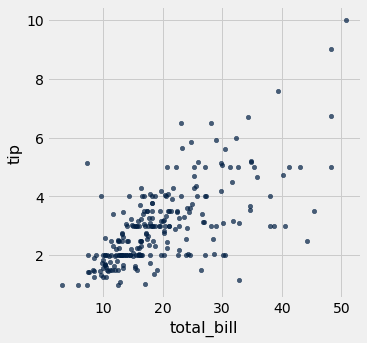

In [22]:
tips.scatter("total_bill","tip")

We will predict by using an average of the values around the bill.

In [6]:
def est_tip(bill,window):
    """
    Using the points within the window, we will estimate the tip as a weighted average of the nearby points.
    bill - the total bill amount
    window - the half width of the window
    """
    return tips.where('total_bill', ds.are.between(bill-window, bill + window)).column('tip').mean()

In [24]:
est_tip(20,1)

3.143333333333333

We need a lambda function for the apply method.

In [25]:
tips.apply(lambda x: est_tip(x,1),"total_bill")[:9]

array([2.824375  , 1.81136364, 3.3425    , 3.33866667, 3.56266667,
       4.19909091, 1.865     , 3.48111111, 2.426     ])

Check code.

In [26]:
tips.row(0).item(0)

16.99

In [27]:
est_tip(tips.row(0).item(0),1)

2.824375

In [28]:
my_tips=tips.with_columns("Predicted Tip",tips.apply(lambda x: est_tip(x,1),"total_bill"))
my_tips

total_bill,tip,sex,smoker,day,time,size,Predicted Tip
16.99,1.01,Female,No,Sun,Dinner,2,2.82437
10.34,1.66,Male,No,Sun,Dinner,3,1.81136
21.01,3.5,Male,No,Sun,Dinner,3,3.3425
23.68,3.31,Male,No,Sun,Dinner,2,3.33867
24.59,3.61,Female,No,Sun,Dinner,4,3.56267
25.29,4.71,Male,No,Sun,Dinner,4,4.19909
8.77,2,Male,No,Sun,Dinner,2,1.865
26.88,3.12,Male,No,Sun,Dinner,4,3.48111
15.04,1.96,Male,No,Sun,Dinner,2,2.426
14.78,3.23,Male,No,Sun,Dinner,2,2.43833


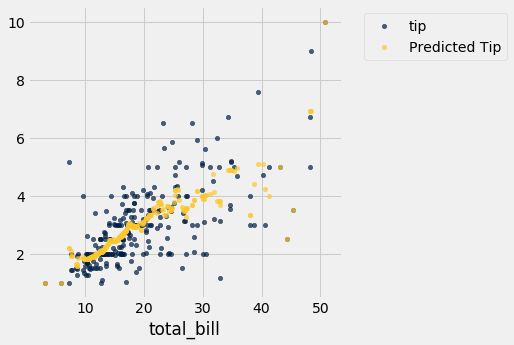

In [29]:
my_tips.scatter("total_bill",["tip","Predicted Tip"])

In [30]:
my_tips=tips.with_columns("Predicted Tip",tips.apply(lambda x: est_tip(x,10),"total_bill"))
my_tips

total_bill,tip,sex,smoker,day,time,size,Predicted Tip
16.99,1.01,Female,No,Sun,Dinner,2,2.69279
10.34,1.66,Male,No,Sun,Dinner,3,2.39717
21.01,3.5,Male,No,Sun,Dinner,3,2.92876
23.68,3.31,Male,No,Sun,Dinner,2,3.17346
24.59,3.61,Female,No,Sun,Dinner,4,3.24286
25.29,4.71,Male,No,Sun,Dinner,4,3.3137
8.77,2,Male,No,Sun,Dinner,2,2.35281
26.88,3.12,Male,No,Sun,Dinner,4,3.48058
15.04,1.96,Male,No,Sun,Dinner,2,2.62133
14.78,3.23,Male,No,Sun,Dinner,2,2.61529


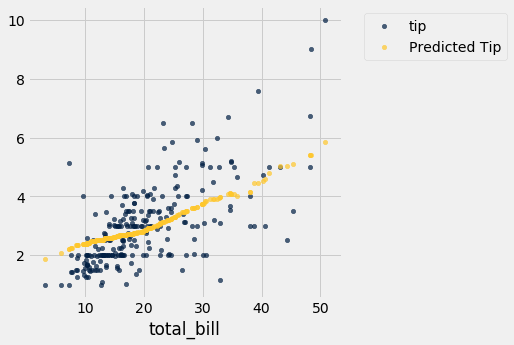

In [31]:
my_tips.scatter("total_bill",["tip","Predicted Tip"])

In [32]:
my_tips=tips.with_columns("Predicted Tip",tips.apply(lambda x: est_tip(x,50),"total_bill"))
my_tips

total_bill,tip,sex,smoker,day,time,size,Predicted Tip
16.99,1.01,Female,No,Sun,Dinner,2,2.99828
10.34,1.66,Male,No,Sun,Dinner,3,2.99828
21.01,3.5,Male,No,Sun,Dinner,3,2.99828
23.68,3.31,Male,No,Sun,Dinner,2,2.99828
24.59,3.61,Female,No,Sun,Dinner,4,2.99828
25.29,4.71,Male,No,Sun,Dinner,4,2.99828
8.77,2,Male,No,Sun,Dinner,2,2.99828
26.88,3.12,Male,No,Sun,Dinner,4,2.99828
15.04,1.96,Male,No,Sun,Dinner,2,2.99828
14.78,3.23,Male,No,Sun,Dinner,2,2.99828


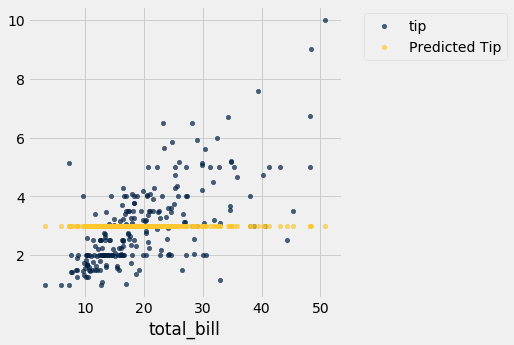

In [33]:
my_tips.scatter("total_bill",["tip","Predicted Tip"])

In [1]:
from ipywidgets import interact

In [4]:
def est(window=1):
    my_tips=tips.with_columns("Predicted Tip",tips.apply(lambda x: est_tip(x,window),"total_bill"))
    my_tips.scatter("total_bill",["tip","Predicted Tip"])

In [7]:
interact(est,window=(.1,50.1,.1))

interactive(children=(FloatSlider(value=1.0, description='window', max=50.1, min=0.1), Output()), _dom_classes=('widget-interact',))

<function __main__.est>